# GDP and Life Expectancy Data Viz Project

This project will investigate if there is a strong correlation between a country's GDP and the life expectancy of its citizens.

**About the dataset**
The dataset comebines life expectancy data from the WHO and GDP data from the World Bank for 6 countries. It includes the following data:
**Country
**Year (year of observation)
**Life Expectancy (years)
**GDP (USD)

The goals are to prepare data, followed by analysis with data visualizations, and seek to explain the findings from the analysis.

Here are a few questions that this project will seek to answer:

+ Has life expectancy increased over time in the six nations?
+ What is the average life expectancy in these nations?
+ What is the distribution of that life expectancy?
+ Has GDP increased over time in the six nations?
+ Which countries experienced the highest increase in life expectancy over time?
+ Which countries experienced the highest increase increase in GDP over time?
+ Is there a correlation between GDP and life expectancy of a country?
+ If there's a linear relationship between GDP and life expectancy, build a linear regression model to predict life expectancy based on GDP of a country.


**Data sources**

- GDP Source: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data, and OECD National Accounts data files.

- Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)


## Import Python Modules

First import the preliminary modules that will be used in this project:

In [244]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm

## Loading the Data

To look for connections between GDP and life expectancy load the datasets into DataFrames so that they can be visualized.

Here **all_data.csv** will be read in into a DataFrame called `df`, followed by a quick inspection of the DataFrame using `.head()` to check its contents.


In [245]:
df = pd.read_csv('all_data.csv')
print(df.head())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


Another check of the shape of `df` is performed. It seems that there are 96 observations or rows and 4 columns. 

In [246]:
df.shape

(96, 4)

## Explore the Data

First, more needs to be explored about the countries that are represented in `df`. There seems to be six countries, Chile, China, Germany, Mexico, the US, and Zimbabwe represented in the data.

In [247]:
countries = (df.Country.unique())
print(countries)

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


The next step is to find out which years are represented in the data, and they are 2000-2015.

In [248]:
years = df.Year.unique()
print(years)


[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


#### Cleaning Column Name

Looking over the data, there are inconsistencies with the column names. For example, the first two column names are one word each, while the third is five words long! `Life expectancy at birth (years)` is descriptive, which will be good for labeling the axis, but a little difficult to wrangle for coding the plot itself. The `rename` function is used to change the column name to `Life Expectancy`.

In [249]:
df = df.rename({'Life expectancy at birth (years)':'Life_Expectancy'}, axis='columns')
df.head()

,Country,Year,Life_Expectancy,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


#### Exploratory Plots

Exploring data through plots can sometimes be much more effective, below the distribution of `GDP` is being shown. The distribution of `GDP` in the data is very right skewed where most of the values are on the left-hand side. This type of distribution could be described as a power law distribution, which is a common enough distribution that it has its own name. More about the power law can be read [here](https://en.wikipedia.org/wiki/Power_law). 

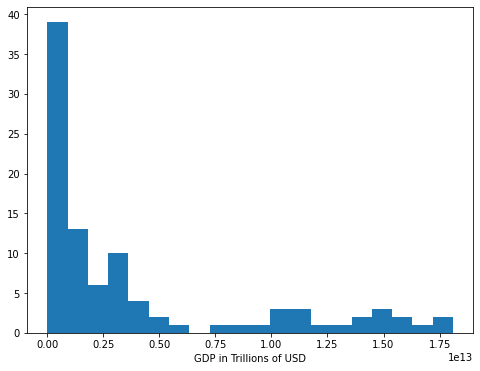

<Figure size 432x288 with 0 Axes>

In [250]:
plt.figure(figsize=(8,6))
plt.hist(df.GDP, bins=20)
plt.xlabel('GDP in Trillions of USD')
plt.show()
plt.clf()

Next the distribution of `Life Expectancy` was examined. The distribution of `Life Expectancy` in the data is very left skewed where most of the values are on the right-hand side. This is almost the opposite of what was observed in the `GDP` column. A further look might also identify different modes or smaller groupings of distributions within the range. 

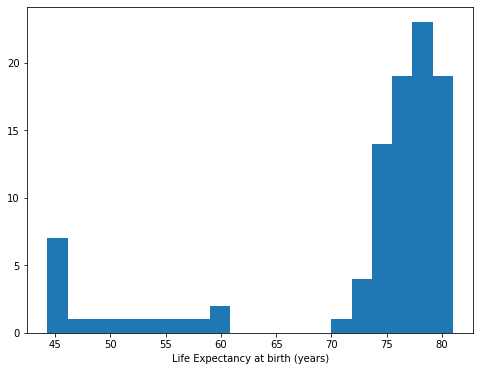

<Figure size 432x288 with 0 Axes>

In [251]:
plt.figure(figsize=(8,6))
plt.hist(df.Life_Expectancy, bins=20)
plt.xlabel('Life Expectancy at birth (years)')
plt.show()
plt.clf()

The previous plots did not break up the data by countries, so the next task will be to find the average `Life_Expectancy` and `GDP` by country.

In [252]:
dfMeans = df.drop('Year', axis=1).groupby('Country').mean().reset_index()

In [253]:
dfMeans

,Country,Life_Expectancy,GDP
0,Chile,78.94375,1.697888e+11
1,China,74.26250,4.957714e+12
2,Germany,79.65625,3.094776e+12
3,Mexico,75.71875,9.766506e+11
4,United States of America,78.06250,1.407500e+13
5,Zimbabwe,50.09375,9.062580e+09


Now that they are broken down by `Country` and the average values for `Life_Expectancy` and `GDP` are created, bar plots showing the mean values for each variable are created below. 

The first plot is Life Expectancy and all of the countries except for Zimbabwe have values in the mid-to-high 70s. This probably explains the skew in the distribution from before!

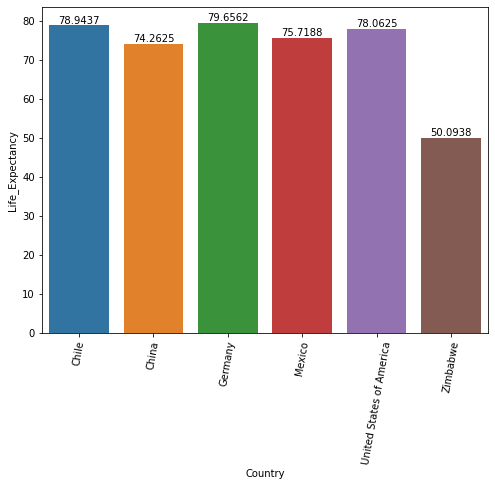

<Figure size 432x288 with 0 Axes>

In [254]:
plt.figure(figsize=(8,6))
sns.barplot(x='Country', y='Life_Expectancy', data=dfMeans)

ax = plt.subplot()
ax.bar_label(ax.containers[0], label_type='edge')
ax.set_xticks(range(len(countries)))
ax.set_xticklabels(countries, rotation=80)

plt.show()
plt.clf()

For the average `GDP` by `Country` it seems that the US has a much higher value compared to the rest of the countries. In this bar plot, Zimbabwe is not even visible where Chile is just barely seen. In comparison the USA has a huge GDP compared to the rest. China, Germany and Mexico seem to be relatively close in figures.

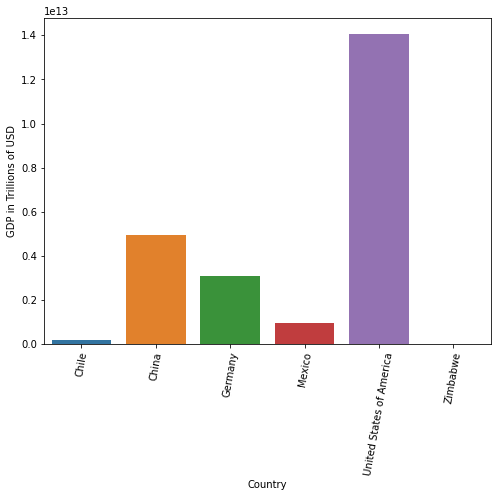

<Figure size 432x288 with 0 Axes>

In [255]:
plt.figure(figsize=(8,6))
sns.barplot(x='Country', y='GDP', data=dfMeans)

ax = plt.subplot()
ax.set_xticks(range(len(countries)))
ax.set_xticklabels(countries, rotation=80)

plt.ylabel('GDP in Trillions of USD')

plt.show()
plt.clf()

#### Violin Plots

Another way to compare data is to visualize the distributions of each and to look for patterns in the shapes.

The violin plot is a popular choice because it can show the shape of the distribution compared to the box plot. Below, country is on the x-axis and the distribution of numeric columns : `GDP` and `Life_Expectancy` are on the y axis. 

In the `GDP` plot on the left, China and the US have a relatively wide range, where Zimbabwe, Chile, and Mexico have shorter ranges. 

In the `Life_Expectancy` plot, many of the countries have shorter ranges except for Zimbabwe which has a range spanning from the high 30s to the high 60s.

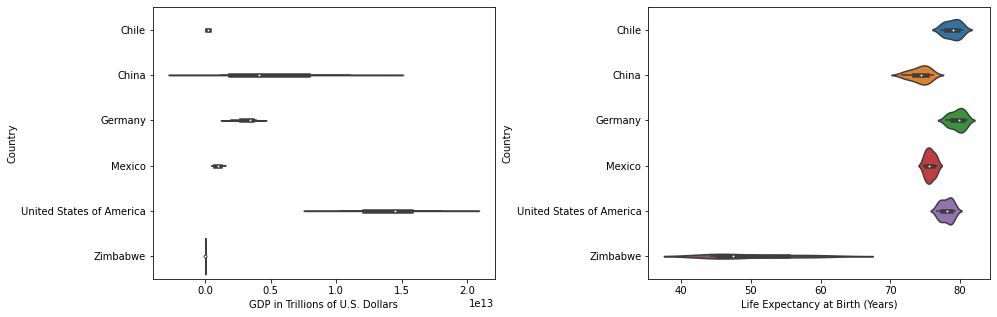

<Figure size 432x288 with 0 Axes>

In [256]:
#Violin plots

fig, axes = plt.subplots(1,2,figsize=(15,5))
axes[0] = sns.violinplot(ax=axes[0], x=df.GDP, y=df.Country)
axes[0].set_xlabel("GDP in Trillions of U.S. Dollars")
axes[1] = sns.violinplot(ax=axes[1], x=df.Life_Expectancy, y=df.Country)
axes[1].set_xlabel("Life Expectancy at Birth (Years)")

plt.subplots_adjust(wspace = 0.45)
plt.show()
plt.clf()

#### Swarm Plots

Another method for showing distributions is the swarm plot, and they can be used to complement the box and violin plots. First the stand alone swarm plot is shown and then overlayed on top of a violin plot. Swarm plots are useful because they show dot density around the values as well as distribution through area/shape. 

In the case of of the `GDP` plot on the left, Chile and Zimbabwe have a vertical line of dots that illustrate the number of data points that fall around their values. This detail would have been lost in the box plot, unless the reader is very adept at data visualizations. 

/Users/lnguyen/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 56.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


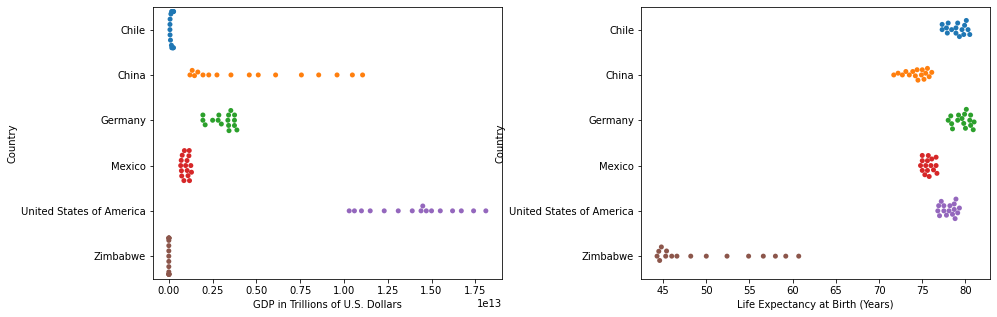

<Figure size 432x288 with 0 Axes>

In [257]:
#Swarm plots

fig, axes = plt.subplots(1,2,figsize=(15,5))
axes[0] = sns.swarmplot(ax=axes[0], x=df.GDP, y=df.Country)
axes[0].set_xlabel("GDP in Trillions of U.S. Dollars")
axes[1] = sns.swarmplot(ax=axes[1], x=df.Life_Expectancy, y=df.Country)
axes[1].set_xlabel("Life Expectancy at Birth (Years)")

plt.subplots_adjust(wspace = 0.4)
plt.show()
plt.clf()

/Users/lnguyen/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 56.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/lnguyen/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 12.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


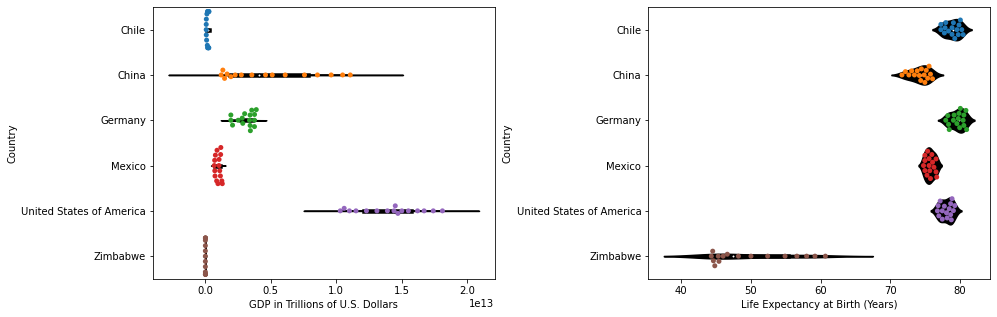

<Figure size 432x288 with 0 Axes>

In [258]:
#Overlay swarm plot on top of violin plot
fig, axes = plt.subplots(1,2,figsize=(15,5))
axes[0] = sns.violinplot(ax=axes[0], x=df.GDP, y=df.Country, color='black')
axes[0] = sns.swarmplot(ax=axes[0], x=df.GDP, y=df.Country)
axes[0].set_xlabel("GDP in Trillions of U.S. Dollars")
axes[1] = sns.violinplot(ax=axes[1], x=df.Life_Expectancy, y=df.Country, color='black')
axes[1] = sns.swarmplot(ax=axes[1], x=df.Life_Expectancy, y=df.Country)
axes[1].set_xlabel("Life Expectancy at Birth (Years)")

plt.subplots_adjust(wspace = 0.45)
plt.show()
plt.clf()

#### Line Charts

Next the data will explore `GDP` and `Life_Expectancy` over the years through line charts. Below the countries are separated by colors.
Findings:
+ From 2000 to 2015, China, Germany, and USA experienced the most growth in GDP. Chile, Mexico, and Zimbabwe saw smaller increases. China made the most gains, going from less than a quarter trillion to around 1 trillion USD.
+ All countries experienced a small increase in average life expectancy from 2000-2015. With the exception of Zimbabwe, which made the most significant gain in average life expectancy, going from arond 45 years to 60 years from 2000 to 2015. However, Zimbabwe's LE is still lower than all the other countries by ar leasr 10 years.

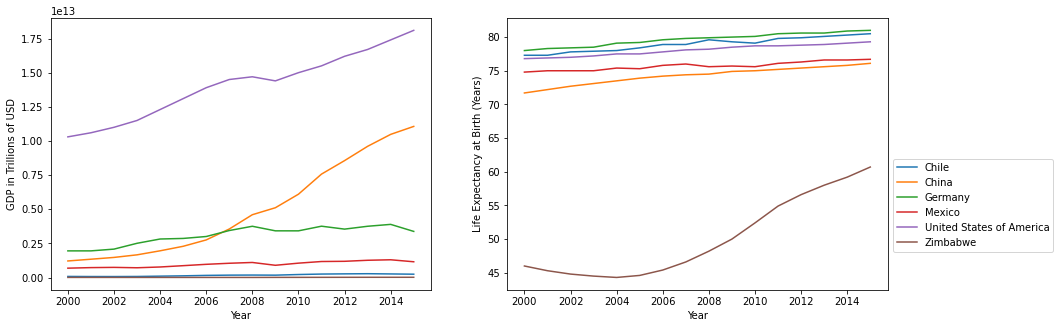

<Figure size 432x288 with 0 Axes>

In [259]:
fig, axes = plt.subplots(1,2, figsize=(15,5))

axes[0] = sns.lineplot(ax=axes[0], x=df.Year, y=df.GDP, hue=df.Country)
axes[0].set_xlabel("Year")
axes[0].set_ylabel("GDP in Trillions of USD")
axes[0].get_legend().remove()

axes[1] = sns.lineplot(ax=axes[1], x=df.Year, y=df.Life_Expectancy, hue=df.Country)
axes[1].set_xlabel("Year")
axes[1].set_ylabel("Life Expectancy at Birth (Years)")

plt.legend(loc='best', bbox_to_anchor=(1, 0.5), ncol=1)


plt.show()
plt.clf()


Another aspect that was looked more into depth was the faceted line charts by Country. In the individual plots, each country has their own y axis, which makes it easier to compare the shape of their `GDP` over the years without the same scale. This method makes it easier to see that all of the countries have seen increases. In the chart above, the other country's GDP growth looked modest compared to China and the US, but all of the countries did experience growth from the year 2000.

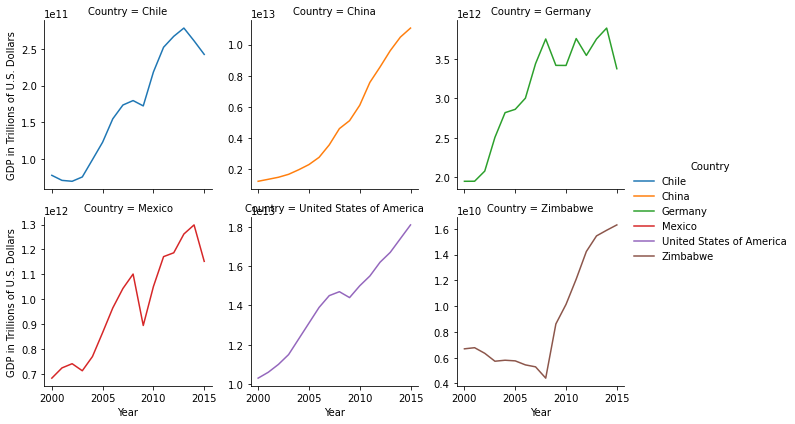

In [260]:
graphGDP = sns.FacetGrid(df, col="Country", col_wrap=3, hue = "Country", sharey = False)

graphGDP = (graphGDP.map(sns.lineplot,"Year","GDP")
            .add_legend()
            .set_axis_labels("Year","GDP in Trillions of U.S. Dollars"))

graphGDP;

Much like the break down of GDP by country before, the plot below breaks out life expectancy by country. It is apparent that Chile, and Mexico seemed to have dips in their life expectancy around the same time which could be looked into further. This type of plotting proves useful since much of these nuances were lost when the y axis was shared among the countries. Also the seemingly linear changes were in reality was not as smooth for some of the countries.

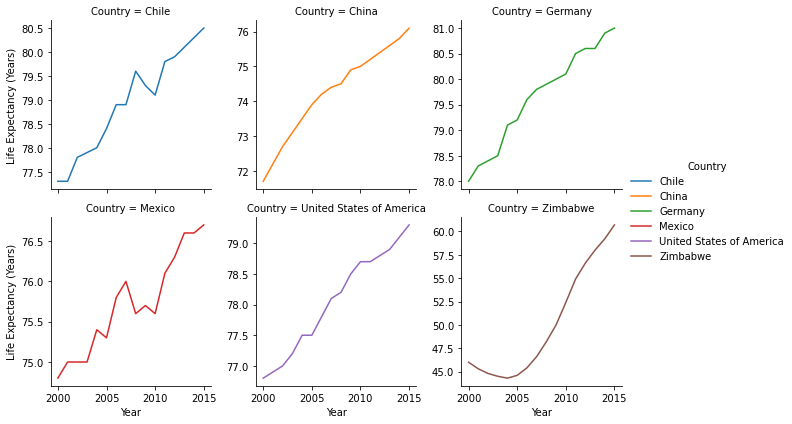

In [261]:
graphLE = sns.FacetGrid(df, col="Country", col_wrap=3, hue="Country", sharey=False)
graphLE = (graphLE.map(sns.lineplot, "Year", "Life_Expectancy")
           .add_legend()
           .set_axis_labels("Year", "Life Expectancy (Years)"))
graphLE;

#### Scatter Plot

The next two charts will explore the relationship between `GDP` and `Life Expectancy`. In the chart below, it looks like the previous charts where GDP for Zimbabwe is staying flat, while their life expectancy is going up. For the other countries they seem to exhibit a rise in life expectancy as GDP goes up. The US and China seem to have very similar slopes in their relationship between GDP and life expectancy.

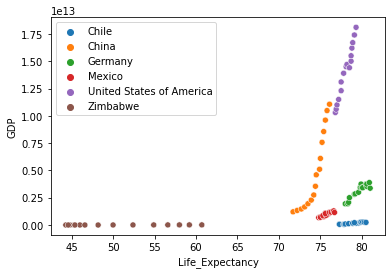

Correlation: 0.34


<Figure size 432x288 with 0 Axes>

In [266]:
#Plot scatterplot
sns.scatterplot(x="Life_Expectancy", y="GDP", hue="Country", data=df)
plt.legend(loc="best")
plt.show()
plt.clf()

#Calculate correlation
from scipy.stats import pearsonr
corr,p = pearsonr(df.Life_Expectancy, df.GDP)
print('Correlation: {:.2f}'.format(corr))   

Like the previous plots, countries are broken out into each scatter plot by facets. Looking at the individual countries, most countries like the US, Mexico and Zimbabwe have linear relationships between GDP and life expectancy. China on the other hand has a slightly exponential curve, and Chile's looks a bit logarithmic. In general though one can see an increase in GDP and life expectancy, exhibiting a positive correlation.

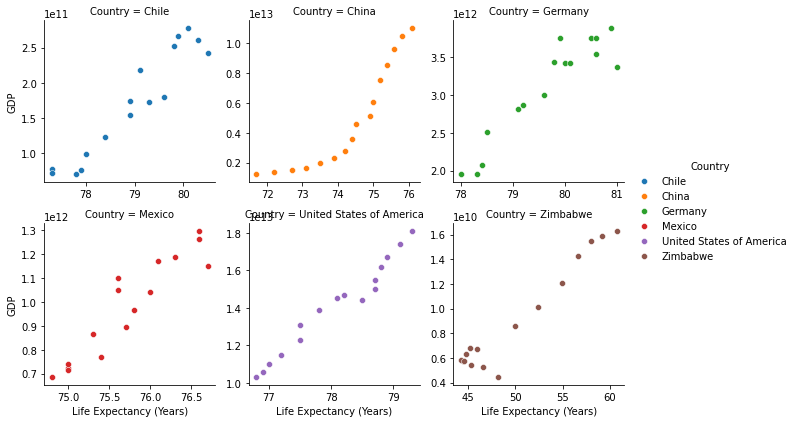

In [263]:
GraphScatter = sns.FacetGrid(df, col="Country", col_wrap=3, hue="Country", sharey=False, sharex=False)
GraphScatter = GraphScatter.map(sns.scatterplot,'Life_Expectancy', 'GDP').add_legend().set_axis_labels("Life Expectancy (Years)", "GDP")
GraphScatter;

We want to apply linear regression model to predict Life Expectancy using GDP based on data from these six countries. First, we must validate whether each country's variables meets the 3 assumptions of linear regression. Let's take Mexico as an example.
+ **Linear relationship: Based on the above plots, all countries except China and Chile seem to satisfy this assumption.**
+ **Normality: Residuals appear to be normally distributed.**
+ **Homoscedasicity: No apparent pattern between residuals and fitted values.**

Intercept    7.302091e+01
GDP          2.762337e-12
dtype: float64


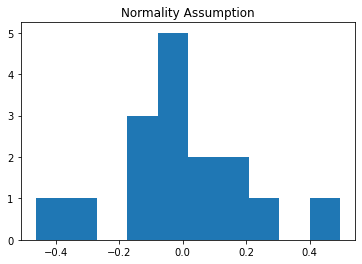

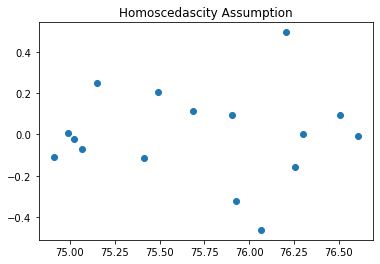

<Figure size 432x288 with 0 Axes>

In [264]:
dfM = df[df.Country=='Mexico']
dfM = dfM.rename({'Life expectancy at birth (years)':'Life_Expectancy'}, axis='columns')

#Fit model
model = sm.OLS.from_formula('Life_Expectancy~GDP', data=dfM).fit()
print(model.params)

# Validate normality and homoscedascity assumption

fitted_values = model.predict(dfM.GDP)
residuals = dfM.Life_Expectancy - fitted_values

plt.hist(residuals)
plt.title('Normality Assumption')
plt.show()
plt.clf()

plt.scatter(fitted_values, residuals)
plt.title('Homoscedascity Assumption')
plt.show()
plt.clf()


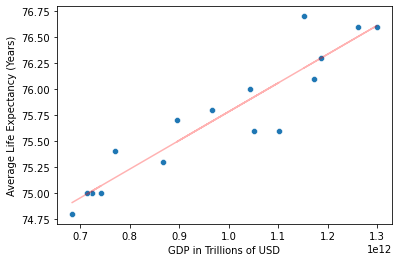

<Figure size 432x288 with 0 Axes>

In [265]:
#Visualize Line of Best Fit

sns.scatterplot(x=dfM.GDP, y=dfM.Life_Expectancy)
plt.plot(dfM.GDP, model.params[0] + model.params[1]*dfM.GDP, color='red', alpha=0.3)
plt.xlabel('GDP in Trillions of USD')
plt.ylabel('Average Life Expectancy (Years)')

plt.show()
plt.clf()


## Conclusions

The analysis propvided answers some of the questions posed in the beginning:

+ Has life expectancy increased over time in the six nations? Which countries experienced the highest increase in life expectancy over time?
    - Yes with Zimbabwe having the greatest increase.
    
+ What is the average life expectancy in these nations?
    - Average life expectancy was between mid to high 70s for the countries except for Zimbabwe which was 50.

+ What is the distribution of that life expectancy?
    - the life expectancy had a left skew, with most data points falling on the right tail of the distribution curve. This indicates that most countries in our dataset have an average LE on the higher end.

+ Has GDP increased over time in the six nations? Which countries experienced the highest increase increase in GDP over time?
    - GDP has also increased for all countries in our dataset, especially for China.
    
+ Is there a correlation between GDP and life expectancy of a country?
    - Yes there is a positive correlation between GDP and life expectancy for countries in our list. For some countries such as Mexico, USA, Germany, Zimbabwe, life expectancy and GDP seems to have a linear, positively correlared relationship.

## Further Research 

The study wanted to explore what happened in China in the past 10 years that caused the GDP to increase so drastically.

This [Forbes article](https://www.forbes.com/sites/peterpham/2018/03/06/is-there-a-secret-growth-hormone-added-to-chinas-economy/#40869ba53f13) describes China's unmatched GDP growth in the past decades were due to it's large population, newly available capital and manufacturing efficiency. The study can ascertain that the findings in the data matches the real world findings for GDP growth in China.